#### Run the below code to import all libraries required to run sample code within this notebook

In [1]:
import numpy as np 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected=True)
import numpy as np

import random
import pandas as pd
from IPython.display import display, Math

from bokeh.io import show, output_notebook
from bokeh.plotting import figure, show
from scipy.stats import norm 
from bokeh import plotting as pl
from bokeh.models import HoverTool, Arrow, OpenHead, NormalHead, VeeHead
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
output_notebook()
import matplotlib.pyplot as plt

Loading BokehJS ...

### Solution code

```python
# Just run the above code
```

In the last notebook we looked at simple examples of how to apply ANOVA when we have a single categorical variable. This notebook, we are going to look at a more realistic example of ANOVA. So our focus in this notebook will be- 

1) One way ANOVA- A more complex example <br>


Unlike the last notebook, we are not going to really be doing the ANOVA calculation the hard way. We will utilize the statsmodel module to make our life easier. If you are super curious, do go back and try to see if you can calculate these the ANOVA results the hard way. 

So lets begin 

## One way ANOVA- A more complex example

First, we are going to utilize the flags dataset and identify a categorical variable to work with. Let's start by importing the data 


In [2]:
flag_data = pd.read_csv("../../../data/flags_data.csv", header= None)
col_names = pd.read_csv("../../../data/flag_colnames.txt", header = None)[0]
flag_data.columns =col_names
flag_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


### Solution code

```python
# Just run the above code
```

Question: In this dataset what do you think can be considered as continuous variable? 
Answer: Two options stand out, one is area, the other is population. Both are unbounded variables. 

So let's define our ANOVA problem, what we want to understand is what given religion as the categorical variable. Is the mean population the same for all religious groups. So how many religions groups are there in the dataset? 

Question: How will you figure out how many groups are in the categorical variable "religion" ? As a bonus can you get the count of how many countries belong to each religious group?

Let's find out...(Execute the code below)

In [3]:
#answer 
print("value count for the region column is- \n {}".format(flag_data["religion"].value_counts()))
value_count_rel = flag_data["religion"].value_counts()

value count for the region column is- 
 1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64


### Solution code

```python
# Just run the above code
```

That was easy right! You can do it using for loops as well but this is much faster. This is the power of pandas. Let's actually plot and see what we get. It's always good to visualize the data. 


In [4]:
data = [go.Bar(
            x=value_count_rel.index,
            y=value_count_rel.values
    )]

layout = go.Layout( 
            title ="Religion (categorical variable) vs number of countires breakdown",
            xaxis=dict(title="Religious group "),
            yaxis=dict(title= "Number of countries" )
         )
figure = go.Figure(data= data, layout =layout)
iplot(figure, filename='basic-bar')


### Solution code

```python
# Just run the above code
```

This is interesting that the country with religious label 1 is practiced in the most number of countries. Of course that does not mean that its practice by the most number of people! since that is a difference calculation. One thing to note is that I haven't told you what each of these labels mean. You can go look up the data dictionary but I would rather you do not do so. This is just to play around with data when you do not know about what that data means. Honestly for our analysis it does not matter. We are not doing any kind of rigorous exploratory data analysis(EDA). Now that we have this information about how many levels we have and what is the count at each level, let's apply the statsmodel ANOVA. 

Question: Generate a combined dataset of the religion and population variables, plot the results, this time use matplotlib? Can you describe your results, what do you think our ANOVA will yield? 



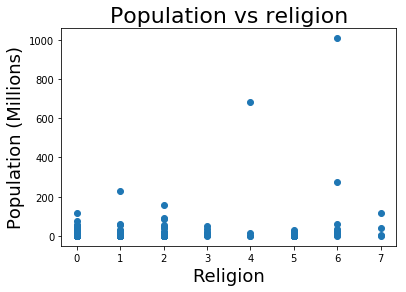

In [5]:
# answer 

pop_rel_dataset= flag_data[["religion","population"]]

plt.scatter(pop_rel_dataset["religion"], pop_rel_dataset["population"])
plt.title("Population vs religion", fontsize =22)
plt.xlabel("Religion", fontsize =18)
plt.ylabel("Population (Millions)", fontsize =18)
plt.show()


### Solution code

```python
# Just run the above code
```

Just to plot around in another library, we made you try out matplotlib. So looking at it naively, we can come to the conclusion that ANOVA may yield that the mean population for each religion is approximately the same based on the number of countries. But then again there are a few massive outliers here. Especially for 4 and 6. So let's see what actually happens. 

Question: apply the statsmodel anova test to this dataset, what do you get? Summarize your results
 

In [6]:
# answer
model =ols( 'population ~ C(religion)', data= pop_rel_dataset).fit()
anova_results = sm.stats.anova_lm(  model, typ= 2)
print(anova_results)


                   sum_sq     df         F    PR(>F)
C(religion)  2.075678e+05    7.0  3.874122  0.000582
Residual     1.423644e+06  186.0       NaN       NaN


### Solution code

```python
# Just run the above code
```

Interesting! So we find that the p-value is smaller than a significance level of 5%. Why is this? Well if you look at groups 4 and 6, we have these outliers, they will skew the mean to very large values. This teaches us an important lesson. 

<b>ANOVA and in general tests that use means will be sensitive to outliers</b>
    
In any kind of analysis that you do, it is important to remember this since outliers can really mess with your results. In this case removing outliers may not make sense because it represents we care about how the total population is varying with religion. You can throw out 1000 million (1 billion) people from the calculation! it would skew the mean way too hard. But depending on the way that you ask the question you can throw out certain outlier points. The most important thing to ask in such situation is- why do you have outliers in the first place?  Does it make sense for me to throw out an outlier? 

With this we will be closing out Anova. The core thing to remember is that such analysis can help us discover interactions that we may have between our dependent and categorical variables.

In [7]:
# End of notebook

### Solution code

```python
# End of notebook
```